<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg">
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Nerses Bagiyan](https://www.linkedin.com/in/nersesbagiyan/), [Yulia Klimushina](https://www.linkedin.com/in/yuliya-klimushina-7168a9139), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Free use is permitted for any non-commercial purpose.
    
*You can also check out video lectures: [theoretical part](https://www.youtube.com/watch?v=l3jiw-N544s), [practical part](https://www.youtube.com/watch?v=7o0SWgY89i8).*

# <center>Topic 4. Linear Classification and Regression
## <center> Part 2. Linear Classification
    
## Article outline
1. [Linear Classifier](#1.-Linear-Classifier)
2. [Logistic Regression as a Linear Classifier](#2.-Logistic-Regression-as-a-Linear-Classifier)
3. [Maximum Likelihood Estimation and Logistic Regression](#3.-Maximum-Likelihood-Estimation-and-Logistic-Regression)
4. [$L_2$-Regularization of Logistic Loss](#4.--$L_2$-Regularization-of-Logistic-Loss)
5. [Assignments](#5.-Assignments)
6. [Useful resources](#6.-Useful-resources)

## 1. Linear Classifier

The basic idea behind the linear classifier is that the two values of the target class can be separated by a hyperplane in the feature space. If this can be done without error, the training set is called *linearly separable*.

<img src="https://habrastorage.org/webt/ft/op/eb/ftopebnttoqgb1qfcm7dphxumjy.png" height=40% />

We have already seen linear regression and Ordinary Least Squares (OLS). Let's consider a binary classification problem, and denote target classes to be "+1" (positive examples) and "-1" (negative examples). One of the simplest linear classifiers can be defined using regression as follows:


$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^\text{T}\textbf x),$$

where
 - $\textbf{x}$ –  is a feature vector (along with identity);
 - $\textbf{w}$ – is a vector of weights in the linear model (with bias $w_0$);
 - $\text{sign}(\bullet)$ – is the signum function that returns the sign of its argument;
 - $a(\textbf{x})$ – is a classifier response for $\textbf{x}$.


## 2. Logistic Regression as a Linear Classifier

Logistic regression is a special case of the linear classifier, but it has an added benefit of predicting a probability $p_+$ of referring example $\textbf{x}_\text{i}$ to the class "+":
$$\Large p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Being able to predict not just a response ( "+1" or "-1") but the *probability* of assignment to class "+1" is a very important requirement in many business problems e.g. credit scoring where logistic regression is traditionally used. Customers who have applied for a loan are ranked based on this predicted probability (in descending order) to obtain a scoreboard that rates customers from bad to good. Below is an example of such a toy scoreboard.

 <img src='https://habrastorage.org/webt/5k/un/wv/5kunwvhd0_yackkmxchgkhytlxa.png' width=35%>

The bank chooses a threshold $p_*$ to predict the probability of loan default (in the picture it's $0.15$) and stops approving loans starting from that value. Moreover, it is possible to multiply this predicted probability by the outstanding amount to get the expectation of losses from the client, which can also constitute good business metrics (scoring experts may have more to add, but the main gist is this).



To predict the probability $p_+ \in [0,1]$, we can start by constructing a linear prediction using OLS: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. But converting the resulting value to the probability within in the [0, 1] range requires some function $f: \mathbb{R} \rightarrow [0,1].$. Logistic regression uses a specific function for this: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$. Now let's understand what the prerequisites are.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
def sigma(z):
    return 1.0 / (1 + np.exp(-z))

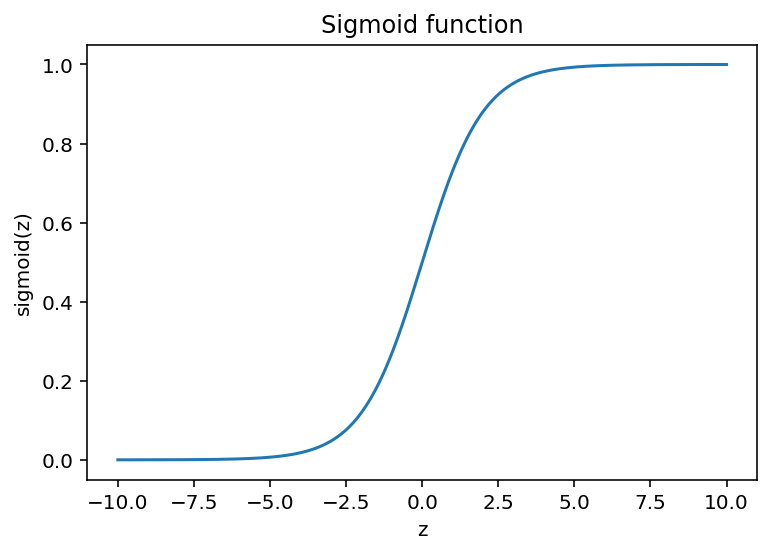

In [3]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx])
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function");

Let's denote the probability of an event $X$ as $P(X)$. Then the odds ratio $OR(X)$ is determined by $\frac{P(X)}{1-P(X)}$, which is the ratio of the probabilities of whether or not an event will happen. It is obvious that the probability and odds ratio contain the same information, but, while $P(X)$ ranges from 0 to 1, $OR(X)$ is in the range of 0 to $\infty$.

If we calculate the logarithm of $OR(X)$ (a logarithm of odds or log probability ratio), it is easy to notice that $\log{OR(X)} \in \mathbb{R}$. This is what we will use with OLS.

Let's see how logistic regression will make a prediction $p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$. (For now, let's assume that we have somehow obtained weights $\textbf{w}$ i.e. trained the model. Later, we'll look at how it is done.)

**Step 1.** Calculate $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (Equation $\textbf{w}^\text{T}\textbf{x} = 0$ defines a hyperplane separating the examples into two classes);

**Step 2.** Compute the log odds ratio: $ \log(OR_{+}) = \textbf{w}^\text{T}\textbf{x}$.

**Step 3.** Now that we have the chance of assigning an example to the class of "+" - $OR_{+}$, calculate $p_{+}$ using the simple relationship:

$$\large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} = \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$

On the right side, you can see that we have the sigmoid function.

So, logistic regression predicts the probability of assigning an example to the "+" class (assuming that we know the features and weights of the model) as a sigmoid transformation of a linear combination of the weight vector and the feature vector:

$$\large p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

Next, we will see how the model is trained. We will again rely on maximum likelihood estimation.

## 3. Maximum Likelihood Estimation and Logistic Regression

Now let's see how an optimization problem for logistic regression is obtained from the MLE, namely, minimization of the *logistic* loss function. We have just seen that logistic regression models the probability of assigning an example to the class "+" as:


$$\Large p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^T\textbf{x}_\text{i})$$

Then, for the class "-", the corresponding expression is as follows:
$$\Large p_-(\textbf{x}_\text{i})  = P\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^T\textbf{x}_\text{i}) = \sigma(-\textbf{w}^T\textbf{x}_\text{i}) $$

Both of these expressions can be cleverly combined into one (watch carefully, maybe you are being tricked):

$$\Large P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^T\textbf{x}_\text{i})$$

The expression $M(\textbf{x}_\text{i}) = y_i\textbf{w}^T\textbf{x}_\text{i}$ is known as the margin of classification on the object $\textbf{x}_\text{i}$ (not to be confused with a gap, which is also called margin, in the SVM context). If it is non-negative, the model is correct in choosing the class of the object $\textbf{x}_\text{i}$; if it is negative, then the object $\textbf{x}_\text{i}$ is misclassified. Note that the margin is defined for objects in the training set only where real target class labels $y_i$ are known.

To understand exactly why we have come to such a conclusion, let us turn to the geometrical interpretation of the linear classifier.

First, I would recommend looking at a classic, introductory problem in linear algebra: find the distance from the point with a radius-vector $\textbf{x}_A$ to a plane defined by the equation $\textbf{w}^\text{T}\textbf{x} = 0.$


<details>
<summary>Answer</summary>
<p>
$$\rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$$
</p>
</details>

<img src = 'https://habrastorage.org/webt/xy/1i/gt/xy1igt7hfz0prsh4vy1dvosxc1y.png' width=50%>

When we get to the answer, we will understand that the greater the absolute value of the expression $\textbf{w}^\text{T}\textbf{x}_\text{i}$, the farther the point $\textbf{x}_\text{i}$ is from the plane $\textbf{w}^\text{T}\textbf{x} = 0.$

Hence, our expression $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ is a kind of "confidence" in our model's classification of the object $\textbf{x}_\text{i}$:

- if the margin is large (in absolute value) and positive, the class label is set correctly, and the object is far away from the separating hyperplane i.e. classified confidently. See Point $x_3$ on the picture;
- if the margin is large (in absolute value) and negative, then class label is set incorrectly, and the object is far from the separating hyperplane (the object is most likely an anomaly; for example, it could be improperly labeled in the training set). See Point $x_1$ on the picture;
- if the margin is small (in absolute value), then the object is close to the separating hyperplane, and the margin sign determines whether the object is correctly classified. See Points $x_2$ and $x_4$ on the plot;

<img src = 'https://habrastorage.org/webt/r-/eo/jp/r-eojps1kepfkconwav4xksutzy.png' width=50%>

Let's now compute the likelihood of the data set i.e. the probability of observing the given vector $\textbf{y}$ from data set $X$. We'll make a strong assumption: objects come independently from one distribution (*i.i.d.*). Then, we can write

$$\large P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

where $\ell$ is the length of data set $\textbf{X}$ (number of rows).

As usual, let's take the logarithm of this expression because a sum is much easier to optimize than the product:

$$\large \log P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})   = $$

$$\large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}} = $$

$$\large - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})$$

Maximizing the likelihood is equivalent to minimizing the expression:

$$\Large \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}).$$

This is *logistic* loss function that is summed over all objects in the training set.

Let's look at the new function as a function of margin $L(M) = \log (1 + \exp^{-M})$ and plot it along with *zero-one loss* graph, which simply penalizes the model for error on each object by 1 (negative margin): $L_{1/0}(M) = [M < 0]$.

<img src = 'https://habrastorage.org/webt/7r/lu/7j/7rlu7j74trxlicsytw81ruyeyy4.png' width=60%>

The picture reflects the idea that, if we are not able to directly minimize the number of errors in the classification problem (at least not by gradient methods - derivative of the zero-one loss function at zero turns to infinity), we can minimize its upper bounds. For the logistic loss function (where the logarithm is binary, but this does not matter), the following is valid:

$$\Large \mathcal{L_{1/0}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

where $\mathcal{L_{1/0}} (\textbf X, \textbf{y})$ is simply the number of errors of logistic regression with weights $\textbf{w}$ on a data set $(\textbf X, \textbf{y})$.

Thus, by reducing the upper bound of $\mathcal{L_{log}}$ by the number of classification errors, we hope to reduce the number of errors itself.

## 4.  $L_2$-Regularization of Logistic Loss
$L_2$-regularization of logistic regression is almost the same as in the case of ridge regression. Instead of minimizing the function $\mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w})$ we minimize the following:

$$\Large \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

In the case of logistic regression, a reverse regularization coefficient $C = \frac{1}{\lambda}$ is typically introduced. Then the solution to the problem would be:

$$\Large \widehat{\textbf w}  = \arg \min_{\textbf{w}} \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Next, we'll look at an example that allows us to intuitively understand one of the interpretations of regularization.

## 5. Assignments
### Demo-version
To practice with linear models, you can complete [this demo assignment](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) where you'll build a sarcasm detection model. The assignment is just for you to practice, and goes with [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).

### Bonus version
You can also choose a ["Bonus Assignments" tier](https://www.patreon.com/ods_mlcourse) (details are outlined on the [mlcourse.ai](https://mlcourse.ai/) main page) and get a non-demo version of the assignment where you'll guided through working with sparse data, feature engineering, model validation, and the process of competing on Kaggle. The task will be to beat baselines in a [Kaggle competition](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2). That's a very useful assignment for anyone starting to practice with Machine Learning, regardless of the desire to compete on Kaggle.

## 6. Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-4-linear-classification-and-regression-44a41b9b5220) based on this notebook
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323890/) on Habr.com with ~ the same material. And a [lecture](https://youtu.be/oTXGQ-_oqvI) on YouTube
- A nice and concise overview of linear models is given in the book ["Deep Learning"](http://www.deeplearningbook.org) (I. Goodfellow, Y. Bengio, and A. Courville).
- Linear models are covered practically in every ML book. We recommend "Pattern Recognition and Machine Learning" (C. Bishop) and "Machine Learning: A Probabilistic Perspective" (K. Murphy).
- If you prefer a thorough overview of linear model from a statistician's viewpoint, then look at "The elements of statistical learning" (T. Hastie, R. Tibshirani, and J. Friedman).
- The book "Machine Learning in Action" (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Search for linear regression and logistic regression.

## Support course creators
<br>
<center>
You can make a monthly (Patreon) or one-time (Ko-Fi) donation ↓

<br>
<br>

<a href="https://www.patreon.com/ods_mlcourse">
<img src="https://habrastorage.org/webt/zc/11/0y/zc110yh0u3kgnlmay1gwbekk0ys.png" width=20% />

<br>

<a href="https://ko-fi.com/mlcourse_ai">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />
    
</center>